# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [182]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [183]:
city_df = pd.read_csv("../output_data/cities.csv")

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    response = requests.get(query_url + city).json()
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
try:
    print(f"Beginning Data Retrieval")
    print(f"----------------------------")
    print(f"{cities}")    
    cities.loc[index, 'City'] = results[0]['City']
        
except (KeyError, IndexError):
    print("City not found. Skipping...")
        
print("------------")
print("Data Retieval Complete")
print("------------")
#NEED TO READJUST THIS STEP TO FORMAT CORRECTLY

Beginning Data Retrieval
----------------------------
['mahebourg', 'hobart', 'mendi', 'rivera', 'khash', 'lephepe', 'cayenne', 'prieska', 'severo-kurilsk', 'lebu', 'esperance', 'samusu', 'curup', 'ushuaia', 'tingi', 'nicoya', 'busselton', 'yellowknife', 'thinadhoo', 'bloemfontein', 'tautira', 'jamestown', 'hilo', 'shenjiamen', 'chokurdakh', 'sao felix do xingu', 'pevek', 'roebourne', 'punta arenas', 'narsaq', 'hobyo', 'bluff', 'kaitangata', 'carnarvon', 'petropavlovsk-kamchatskiy', 'upernavik', 'port alfred', 'bredasdorp', 'sarishabari', 'port elizabeth', 'ancud', 'qaanaaq', 'rikitea', 'ponta do sol', 'mtwara', 'albany', 'butaritari', 'guadalupe', 'fortuna', 'salalah', 'atessa', 'kayfan', 'praia da vitoria', 'atherton', 'puerto ayora', 'coquimbo', 'entebbe', 'barrow', 'georgetown', 'seoul', 'minab', 'illoqqortoormiut', 'novo horizonte', 'tabarqah', 'alofi', 'caravelas', 'amderma', 'rincon', 'skibbereen', 'tiksi', 'salinas', 'kieta', 'tuktoyaktuk', 'marbella', 'bairiki', 'kapaa', 'east

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [184]:
city_df = pd.read_csv("../output_data/cities.csv")
weather_df = {"City":cities}
weather_df = pd.DataFrame(city_df)
weather_df.count()

#weather_df =‘python-api-challenge/WeatherPy’
 #with open(weather_df,’r’, newline = ‘’) as f:
   #read = csv.writer(f, lineterminator = ‘\n’)
   #read.writerows(cities)
#city_df = pd.read_csv("../output_data/cities.csv")

City_ID       548
City          548
Cloudiness    548
Country       544
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [185]:
#city_df = pd.read_csv("../output_data/cities.csv")
del city_df['City_ID']
city_df = city_df[['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']]
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ostrovnoy,68.05,39.51,37.50,72,2,7.16,RU,1558378754
1,mahebourg,-20.41,57.70,78.80,74,75,11.41,MU,1558378503
2,qaanaaq,77.48,-69.36,22.20,73,25,2.37,GL,1558378755
3,zhuhai,40.71,112.04,44.60,39,0,4.47,CN,1558378755
4,cape town,-33.93,18.42,55.99,76,20,8.05,ZA,1558378755
...,...,...,...,...,...,...,...,...,...
543,yabrud,33.97,36.66,80.60,32,0,8.05,SY,1558378840
544,paraiso,24.01,-104.61,84.20,4,5,16.11,MX,1558378898
545,veraval,49.65,0.71,61.00,62,0,8.05,FR,1558378898
546,novyy urgal,51.07,132.56,49.74,93,100,2.68,RU,1558378899


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [186]:
drop = city_df.drop(city_df[city_df.Humidity > 100].index, inplace=True)
print(drop)
city_df[["Lat", "Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]].describe()

None


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,19.710402,20.861609,64.975119,67.265082,49.495430,8.657057,1.558379e+09
std,33.637627,90.285396,18.721163,21.723477,36.887333,5.859917,7.826709e+01
min,-54.810000,-173.230000,4.920000,4.000000,0.000000,0.540000,1.558378e+09
25%,-6.315000,-60.820000,53.940000,52.000000,14.000000,4.680000,1.558379e+09
50%,21.430000,21.550000,64.990000,71.000000,47.000000,7.000000,1.558379e+09
75%,47.895000,103.165000,80.600000,86.000000,81.000000,11.410000,1.558379e+09
max,78.220000,179.320000,104.100000,100.000000,100.000000,46.080000,1.558379e+09


In [187]:
#  Get the indices of cities that have humidity over 100%.
humidover = city_df['Humidity']>100
print(humidover)
print(humidover.shape)


0      False
1      False
2      False
3      False
4      False
       ...  
543    False
544    False
545    False
546    False
547    False
Name: Humidity, Length: 547, dtype: bool
(547,)


In [176]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#NEED TO FINISH THIS STEP

In [188]:
# Extract relevant fields from the data frame
#summary = ["City", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed","Date"]
#cities = city_df['City'].values
#NEED TO FINISH THIS STEP

# Export the City_Data into a csv
city_df.to_csv('file_name.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

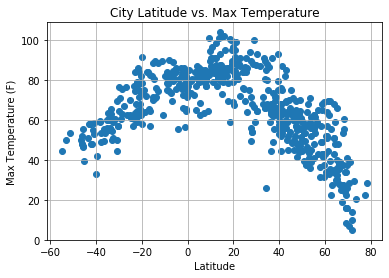

In [189]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVSMaxTemperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

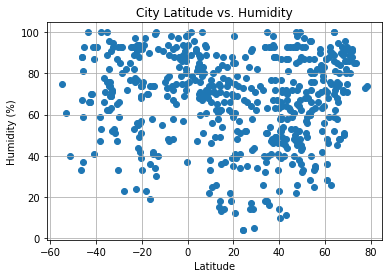

In [190]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVSHumidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

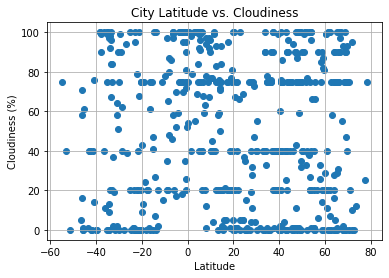

In [191]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVSCloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

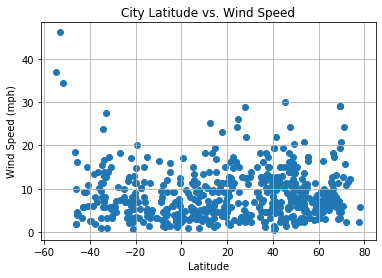

In [192]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVSWindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames
#NEED TO COMPLETE THIS STEP AND ADJUST FOLLOWING REGRESSION PLOTS TO SHOW SUCH 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.15521918338691976


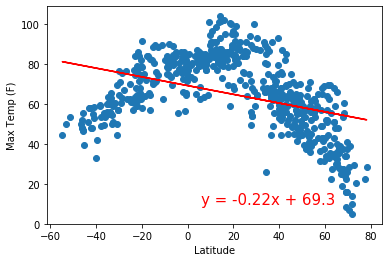

In [206]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.15521918338691976


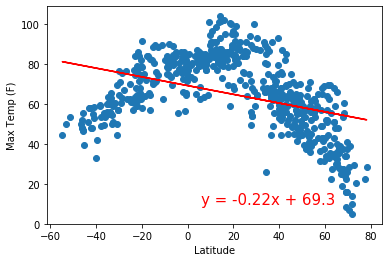

In [205]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0041659855656534794


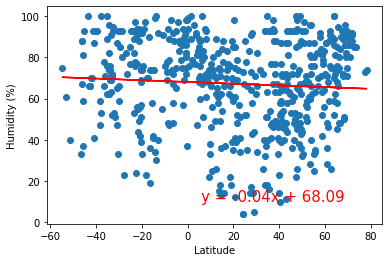

In [204]:
## Convert to floats and store Humidty and Latitude as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0041659855656534794


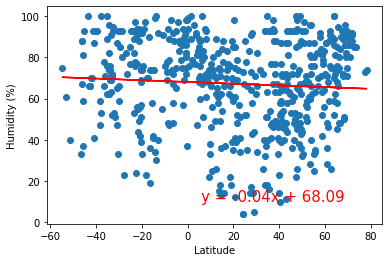

In [203]:
## Convert to floats and store Humidty and Latitude as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0001309858062931013


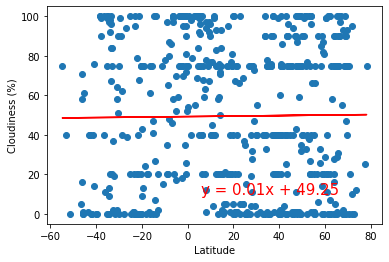

In [202]:
## Convert to floats and store Cloudiness and Latitude as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0001309858062931013


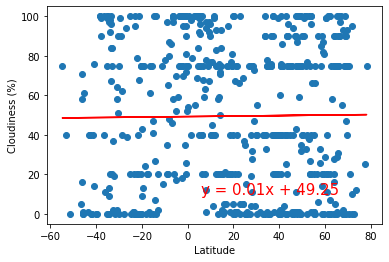

In [201]:
## Convert to floats and store Cloudiness and Latitude as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0022000972651961713


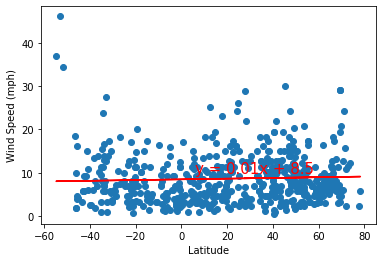

In [200]:
## Convert to floats and store Wind Speed and Latitude as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0022000972651961713


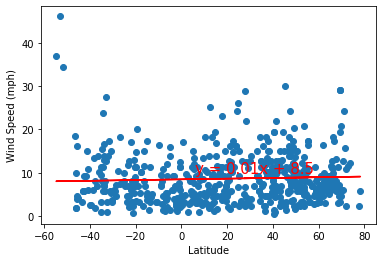

In [207]:
## Convert to floats and store Wind Speed and Latitude as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()